
Grapher je opcioni deo kompajlera koji serijalizuje AST pomoću [jezika za opisivanje grafova](https://en.wikipedia.org/wiki/DOT_(graph_description_language)) i prikazuje ga kao sliku.

![pp-01](https://i.postimg.cc/SNmFQ6X0/pp-01.png)

Importovanje neophodnog modula za enumeraciju klasa tokena.

In [17]:
from enum import Enum, auto

Klasa **Class** definiše sve moguće klase leksema koje se mogu naći u izvornom kodu.

In [18]:
class Class(Enum):
    PLUS = auto()
    MINUS = auto()
    STAR = auto()
    FWDSLASH = auto()
    PERCENT = auto()

    OR = auto()
    AND = auto()
    NOT = auto()

    EQ = auto()
    NEQ = auto()
    LT = auto()
    GT = auto()
    LTE = auto()
    GTE = auto()

    LPAREN = auto()
    RPAREN = auto()
    LBRACKET = auto()
    RBRACKET = auto()
    LBRACE = auto()
    RBRACE = auto()

    ASSIGN = auto()
    SEMICOLON = auto()
    COMMA = auto()

    TYPE = auto()
    INT = auto()
    CHAR = auto()
    STRING = auto()

    IF = auto()
    ELSE = auto()
    WHILE = auto()
    FOR = auto()

    BREAK = auto()
    CONTINUE = auto()

    ID = auto()
    EOF = auto()

    # my classes
    BEGIN = auto()
    END = auto()
    VAR = auto()
    COLON = auto()
    DOT = auto()
    PROC = auto()
    ARRAY = auto()
    OF = auto()
    TO = auto()
    DO = auto()
    THEN = auto()
    DIV = auto()
    MOD = auto()
    BOOLEAN = auto()
    REAL = auto()
    REPEAT = auto()
    UNTIL = auto()
    XOR = auto()
    FUNC = auto()
    EXIT = auto()
    DOWNTO = auto()
    

Klasa **Token** predstavlja uređeni par (klasa, leksema).

Medota **str** vraća string reprezentaciju tokena koja se koristi u procesu pronalaženja grešaka.

In [19]:
class Token:
    def __init__(self, class_, lexeme):
        self.class_ = class_
        self.lexeme = lexeme

    def __str__(self):
        return "<{} {}>".format(self.class_, self.lexeme)

Klasa **Lekser** sadrži metode za leksičku analizu izvornog koda.

Metoda **lex** formira niz tokena pozivajući metodu **next_token**.

Metoda **next_token** konstruiše token odgovarajuće klase pozivajući metodu **next_char**.

Metoda **next_char** pomera pokazivač na sledeći karakter.

Metoda **read_keyword** konstruiše token ključne reči pod uslovom da je trenutni karakter slovo.

Metoda **read_string** konstruiše token string literala pod uslovom da je trenutni karakter znak navodnika.

Metoda **read_char** konstruiše token literala karaktera pod uslovom da je trenutni karakter apostrof.

Metoda **read_int** konstruiše token literala celog broja pod uslovom da je trenutni karakter cifra.

Metoda **read_space** ne konstruiše token, ali pomera pokazivač na prvi sledeći karakter koji nije razmak.

Metoda **die** se koristi u slučaju da je lekser pročitao neočekivani karakter.

In [20]:
class Lexer:
    def __init__(self, text):
        self.text = text
        self.len = len(text)
        self.pos = -1

    def read_space(self):
        while self.pos + 1 < self.len and self.text[self.pos + 1].isspace():
            self.next_char()

    def read_int(self):
        lexeme = self.text[self.pos]
        while self.pos + 1 < self.len and (self.text[self.pos + 1].isdigit() or (self.text[self.pos + 1] == '.' and self.text[self.pos + 2] != '.')):
            lexeme += self.next_char()
        return lexeme

    def read_char(self):
        self.pos += 1
        lexeme = self.text[self.pos]
        self.pos += 1
        return lexeme

    def read_string(self):
        lexeme = ''
        while self.pos + 1 < self.len and self.text[self.pos + 1] != '\'':
            lexeme += self.next_char()
        self.pos += 1
        return lexeme

    def read_keyword(self):
        lexeme = self.text[self.pos]
        while self.pos + 1 < self.len and (self.text[self.pos + 1].isalnum()  or self.text[self.pos + 1] == '_'):
            lexeme += self.next_char()
        if lexeme == 'if':
            return Token(Class.IF, lexeme)
        elif lexeme == 'else':
            return Token(Class.ELSE, lexeme)
        elif lexeme == 'while':
            return Token(Class.WHILE, lexeme)
        elif lexeme == 'for':
            return Token(Class.FOR, lexeme)
        elif lexeme == 'break':
            return Token(Class.BREAK, lexeme)
        elif lexeme == 'continue':
            return Token(Class.CONTINUE, lexeme)
        elif lexeme == 'integer' or lexeme == 'char' or lexeme == 'void' or lexeme == 'boolean' or lexeme == 'real' or lexeme == 'string' or lexeme == 'array':
            return Token(Class.TYPE, lexeme)
        elif lexeme == 'begin':
            return Token(Class.BEGIN,lexeme)
        elif lexeme == 'end':
            return Token(Class.END,lexeme)
        elif lexeme == 'var':
            return Token(Class.VAR,lexeme)
        elif lexeme == 'procedure':
            return Token(Class.PROC,lexeme)
        elif lexeme == 'of':
            return Token(Class.OF,lexeme)
        elif lexeme == 'to':
            return Token(Class.TO,lexeme)
        elif lexeme == 'downto':
            return Token(Class.DOWNTO,lexeme)
        elif lexeme == 'do':
            return Token(Class.DO,lexeme)
        elif lexeme == 'then':
            return Token(Class.THEN,lexeme)
        elif lexeme == 'div':
            return Token(Class.DIV,lexeme)
        elif lexeme == 'mod':
            return Token(Class.MOD,lexeme)  
        elif  lexeme == 'xor':
            return Token(Class.XOR,lexeme)
        elif lexeme == 'repeat':
            return Token(Class.REPEAT,lexeme)
        elif lexeme == 'until':
            return Token(Class.UNTIL,lexeme)
        elif lexeme == 'function':
            return Token(Class.FUNC,lexeme)
        elif lexeme == 'and':
            return Token(Class.AND, lexeme)
        elif lexeme == 'or':
            return Token(Class.OR, lexeme)   
        elif lexeme == 'not':
            return Token(Class.NOT, lexeme)
        elif lexeme == 'exit':
            return Token(Class.EXIT, lexeme)                                  
        return Token(Class.ID, lexeme)

    def next_char(self):
        self.pos += 1
        if self.pos >= self.len:
            return None
        return self.text[self.pos]

    def next_token(self):
        self.read_space()
        curr = self.next_char()
        if curr is None:
            return Token(Class.EOF, curr)
        token = None
        if curr.isalpha():
            token = self.read_keyword()
        elif curr.isdigit():
            value = self.read_int()
            if '.' not in value:
              token = Token(Class.INT, int(value))
            else:
              token = Token(Class.REAL, float(value))            
        elif curr == '\'':
              token = Token(Class.STRING, self.read_string())
        elif curr == '"':
            token = Token(Class.STRING, self.read_string())
        elif curr == '+':
            token = Token(Class.PLUS, curr)
        elif curr == '-':
            token = Token(Class.MINUS, curr)
        elif curr == '*':
            token = Token(Class.STAR, curr)
        elif curr == '=':
              token = Token(Class.EQ, '=')
        elif curr == '<':
            curr = self.next_char()
            if curr == '=':
                token = Token(Class.LTE, '<=')
            elif curr == '>':
                token = Token(Class.NEQ,'<>')
            else:
                token = Token(Class.LT, '<')
                self.pos -= 1
        elif curr == '>':
            curr = self.next_char()
            if curr == '=':
                token = Token(Class.GTE, '>=')
            else:
                token = Token(Class.GT, '>')
                self.pos -= 1
        elif curr == '(':
            token = Token(Class.LPAREN, curr)
        elif curr == ')':
            token = Token(Class.RPAREN, curr)
        elif curr == '[':
            token = Token(Class.LBRACKET, curr)
        elif curr == ']':
            token = Token(Class.RBRACKET, curr)
        elif curr == '{':
            token = Token(Class.LBRACE, curr)
        elif curr == '}':
            token = Token(Class.RBRACE, curr)
        elif curr == ';':
            token = Token(Class.SEMICOLON, curr)
        elif curr == ',':
            token = Token(Class.COMMA, curr)
        elif curr == ':':
            token = Token(Class.COLON,curr)
            curr = self.next_char()
            if(curr == '='):
              token = Token(Class.ASSIGN,':=')
            if(curr != '='):
                self.pos -= 1
        elif curr == '.':
            token = Token(Class.DOT,curr)
        elif curr == '/':
            token = Token(Class.FWDSLASH,curr)
        else:
            self.die(curr)
        return token

    def lex(self):
        tokens = []
        while True:
            curr = self.next_token()
            tokens.append(curr)
            if curr.class_ == Class.EOF:
                break
        return tokens

    def die(self, char):
        raise SystemExit("Unexpected character: {}".format(char))

Klasa **Node** predstavlja baznu klasu za formiranje AST, a klase koje je nasleđuju odgovaraju svakoj ispravnoj semantičkoj strukturi.

In [21]:
class Node():
    pass


class Program(Node):
    def __init__(self, nodes):
        self.nodes = nodes


class Decl(Node):
    def __init__(self, type_, id_):
        self.type_ = type_
        self.id_ = id_


class ArrayDecl(Node):
    def __init__(self, type_, id_, size, elems):
        self.type_ = type_
        self.id_ = id_
        self.size = size
        self.elems = elems


class ArrayElem(Node):
    def __init__(self, id_, index):
        self.id_ = id_
        self.index = index


class Assign(Node):
    def __init__(self, id_, expr):
        self.id_ = id_
        self.expr = expr


class If(Node):
    def __init__(self, cond, true, false):
        self.cond = cond
        self.true = true
        self.false = false


class While(Node):
    def __init__(self, cond, block):
        self.cond = cond
        self.block = block

class Repeat(Node):
    def __init__(self, block, cond):
        self.block = block
        self.cond = cond

# ako je downto true, for sadrzi downto i--
class For(Node):
    def __init__(self, init, cond, block,downto):
        self.init = init
        self.cond = cond
        self.block = block
        self.downto = downto


class FuncImpl(Node):
    def __init__(self, type_, id_, params, block):
        self.type_ = type_
        self.id_ = id_
        self.params = params
        self.block = block

class ProcImpl(Node):
    def __init__(self, id_, params,block):
        self.id_ = id_
        self.params = params
        self.block = block

class FuncCall(Node):
    def __init__(self, id_, args):
        self.id_ = id_
        self.args = args


class Block(Node):
    def __init__(self, nodes):
        self.nodes = nodes

class Params(Node):
    def __init__(self, params):
        self.params = params


class Args(Node):
    def __init__(self, args):
        self.args = args


class Elems(Node):
    def __init__(self, elems):
        self.elems = elems


class Break(Node):
    pass


class Continue(Node):
    pass


class Return(Node):
    def __init__(self, expr):
        self.expr = expr


class Type(Node):
    def __init__(self, value):
        self.value = value


class Int(Node):
    def __init__(self, value):
        self.value = value

class Float(Node):
    def __init__(self, value):
        self.value = value

class Char(Node):
    def __init__(self, value):
        self.value = value


class String(Node):
    def __init__(self, value):
        self.value = value


class Id(Node):
    def __init__(self, value):
        self.value = value


class BinOp(Node):
    def __init__(self, symbol, first, second):
        self.symbol = symbol
        self.first = first
        self.second = second


class UnOp(Node):
    def __init__(self, symbol, first):
        self.symbol = symbol
        self.first = first

class FormatOp(Node):
    def __init__(self,expr, field, decimal):
        self.expr = expr
        self.field = field
        self.decimal = decimal

class ExitOp(Node):
    def __init__(self,args):
        self.args = args

Klasa **Visitor** predstavlja baznu klasu za obilazak AST.

Metoda **visit** u trenutnom objektu traži metodu koja odgovara tipu prosleđenog čvora.

Metoda **die** se koristi u slučaju da tražena metoda ne postoji, tj. u slučaju kada je potrebno obići čvor čiji tip nije podržan.

In [22]:
class Visitor():
    def visit(self, parent, node):
        method = 'visit_' + type(node).__name__
        visitor = getattr(self, method, self.die)
        return visitor(parent, node)

    def die(self, parent, node):
        method = 'visit_' + type(node).__name__
        raise SystemExit("Missing method: {}".format(method))

Importovanje neophodnih modula za čuvanje unutrašnjeg stanja objekta.

In [23]:
from functools import wraps
import pickle

Klasa **Parser** sadrži metode za semantičku analizu izvornog koda koje će iz prosleđenog [FIFO niza](https://en.wikipedia.org/wiki/FIFO_(computing_and_electronics)) tokena formirati AST čvor po čvor.

Metoda **parse** formira AST pomoću [Visitor dizajn šablona](https://sourcemaking.com/design_patterns/visitor) pozivom metode **program**.

Metoda **program** konstruiše AST čvor za deklaraciju globalnih promenljivih i implementaciju funkcija.

Metoda **id_** konstruiše AST čvor za identifikator.

Metoda **decl** konstruiše AST čvor za deklaraciju skalarne promenljive, niza ili funkcije.

Metoda **if_** konstruiše AST čvor za ispitivanje uslova, blok koji se izvršava u slučaju da je uslov tačan i opcioni blok koji se izvršava u slučaju da uslov nije tačan.

Metoda **while_** konstruiše AST čvor za ispitivanje uslova i blok koji se izvršava sve dok je uslov tačan.

Metoda **for_** konstruiše AST čvor za inicijalizaciju iteratora, ispitivanje uslova, inkrementiranje iteratora i blok koji se izvršava sve dok je uslov tačan.

Metoda **block** konstruiše AST čvor za blok instrukcija koje se izvršavaju u okviru neke semantičke celine.

Metoda **params** konstruiše AST čvor za deklarisane parametre funkcije. Svaki parametar ima naziv i tip.

Metoda **args** konstruiše AST čvor za prosleđene argumente pozivu funkcije. Svaki argument ima naziv i vrednost.

Metoda **elems** konstruiše AST čvor za definisane elemente pri inicijalizaciji niza.

Metoda **return_** konstruiše AST čvor za prekid funkcije uz opciono vraćanje vrednosti.

Metoda **break_** konstruiše AST čvor za prekid petlje.

Metoda **continue_** konstruiše AST čvor za skok na sledeću iteraciju petlje.

Metoda **type_** konstruiše AST čvor za tip podataka, tj. "int", "char" ili "void".

Metoda **factor** konstruiše AST čvor za matematičke operacije visokog prioriteta, tj. unarne operacije.

Metoda **term** konstruiše AST čvor za matematičke operacije srednjeg prioriteta, tj. multiplikativne operacije.

Metoda **expr** konstruiše AST čvor za matematičke operacije niskog prioriteta, tj. aditivne operacija.

Metoda **compare** konstruiše AST čvor za poređenje dva logička operanda.

Metoda **logic** konstruiše AST čvor za logičku konjunkciju i disjunkciju.

Metoda **eat** uzima token za početka niza i proverava da li njegova klasa odgovara prosleđenoj klasi.

Metoda **is_func_call** proverava da li trenutni identifikator odgovara pozivu ili implementaciji funkcije. Nakon provere vraća parser u originalno stanje.

Metoda **restorable** se dodaje kao anotacija drugoj metodi koja menja unutrašnje stanje objekta, a potrebno je da se objekat po završetku funkcije vrati u originalno stanje.

Metoda **die** se koristi u slučaju da se dogodi bilo koja greška.

Metoda **die_deriv** se koristi u slučaju da pročitani token ne odgovara sementičkoj strukturi koja se trenutno formira.

Metoda **die_type** se koristi u slučaju da klasa tokena sa početka niza ne odgovara klasi prosleđenoj pozivu metode **eat**.

In [24]:
class Parser:
    def __init__(self, tokens):
        self.tokens = tokens
        self.curr = tokens.pop(0)
        self.prev = None

    def restorable(call):
        @wraps(call)
        def wrapper(self, *args, **kwargs):
            state = pickle.dumps(self.__dict__)
            result = call(self, *args, **kwargs)
            self.__dict__ = pickle.loads(state)
            return result
        return wrapper

    def eat(self, class_):
        if self.curr.class_ == class_:
            self.prev = self.curr
            self.curr = self.tokens.pop(0)
        else:
            self.die_type(class_.name, self.curr.class_.name)

    def program(self):
        nodes = []
        while self.curr.class_ != Class.EOF:
            if self.curr.class_ == Class.PROC:
                nodes.append(self.proc())
                continue
            if self.curr.class_ == Class.FUNC:
                nodes.append(self.func())
                continue
            if self.curr.class_ == Class.BEGIN:
                nodes.append(self.block())
                # mozda continue
            if self.curr.class_ == Class.VAR:
                self.eat(Class.VAR)
                while self.curr.class_ not in [Class.BEGIN, Class.FUNC, Class.PROC]:
                  cvorovi = self.decl()
                  for c in cvorovi:
                    nodes.append(c)
                continue
            if self.curr.class_ == Class.DOT:
                self.eat(Class.DOT)
                if self.curr.class_ != Class.EOF:
                    self.die_deriv(self.program.__name__)
            else:
                self.die_deriv(self.program.__name__)
        return Program(nodes)

    def id_(self):
        id_ = Id(self.curr.lexeme)
        self.eat(Class.ID)
        if self.curr.class_ == Class.LPAREN: # and self.is_func_call():
            self.eat(Class.LPAREN)
            args = self.args()
            self.eat(Class.RPAREN)
            return FuncCall(id_, args)
        elif self.curr.class_ == Class.LBRACKET:
            self.eat(Class.LBRACKET)
            index = self.expr()
            self.eat(Class.RBRACKET)
            id_ = ArrayElem(id_, index)
        if self.curr.class_ == Class.ASSIGN:
            self.eat(Class.ASSIGN)
            expr = self.logic()
            return Assign(id_, expr)
        else:
            return id_

    def func_id_(self):
        id_ = Id(self.curr.lexeme)
        self.eat(Class.ID)
        return id_

    def decl(self):
        var_nodes = []
        var_nodes.append(self.id_())

        while self.curr.class_ == Class.COMMA:
          self.eat(Class.COMMA)
          var_nodes.append(self.id_())
        
        self.eat(Class.COLON)
        type_ = self.type_()

        if type_.value == 'string':
          if self.curr.class_ == Class.LBRACKET:
            self.eat(Class.LBRACKET)
            size = None
            if self.curr.class_ != Class.RBRACKET:
              size = self.expr()
            self.eat(Class.RBRACKET)
            elems = None
            ar_declarations = [
              ArrayDecl(type_, id_node, size, elems) 
              for id_node in var_nodes ]
            self.eat(Class.SEMICOLON)
            return ar_declarations
        elif type_.value == 'array':
          self.eat(Class.LBRACKET)
          min_index = self.factor()
          self.eat(Class.DOT)
          self.eat(Class.DOT)
          max_index = self.factor()
          self.eat(Class.RBRACKET)
          self.eat(Class.OF)
          type_ = self.type_()
          elems = None
          if self.curr.class_ == Class.EQ:
            self.eat(Class.EQ)
            self.eat(Class.LPAREN)
            elems = self.args()
            self.eat(Class.RPAREN)
          self.eat(Class.SEMICOLON)
          arrs_decs = [
                       ArrayDecl(type_, id_node, max_index, elems) 
                       for id_node in var_nodes
          ]
          return arrs_decs

        
        self.eat(Class.SEMICOLON)
        var_declarations = [
              Decl(type_,id_node)
              for id_node in var_nodes
        ]
        return var_declarations

    def func(self):
        self.eat(Class.FUNC)      
        id_ = self.func_id_()
        self.eat(Class.LPAREN)
        params = self.params()
        self.eat(Class.RPAREN)
        self.eat(Class.COLON)
        type_ = self.type_()
        self.eat(Class.SEMICOLON)
        nodes = []
        if self.curr.class_ == Class.VAR:
            self.eat(Class.VAR)
            while self.curr.class_ not in [Class.BEGIN]:
                cvorovi = self.decl()
                for c in cvorovi:
                  nodes.append(c)
        block = self.block(nodes)
        self.eat(Class.SEMICOLON)
        return FuncImpl(type_, id_, params, block)

    def proc(self):
        self.eat(Class.PROC)
        id_ = self.func_id_()
        self.eat(Class.LPAREN)
        params = self.params()
        self.eat(Class.RPAREN)
        self.eat(Class.SEMICOLON)
        nodes = []
        if self.curr.class_ == Class.VAR:
            self.eat(Class.VAR)
            while self.curr.class_ not in [Class.BEGIN, Class.FUNC, Class.PROC]:
                cvorovi = self.decl()
                for c in cvorovi:
                  nodes.append(c)
        block = self.block(nodes)
        self.eat(Class.SEMICOLON)
        return ProcImpl(id_, params, block)

    def if_(self):
        self.eat(Class.IF)
        cond = self.logic()
        self.eat(Class.THEN)
        true = self.block()
        false = None
        if self.curr.class_ == Class.ELSE:
            self.eat(Class.ELSE)
            nodes = []
            if(self.curr.class_ == Class.IF):
                nodes.append(self.if_())
                false = Block(nodes)
            else:
              false = self.block()
              self.eat(Class.SEMICOLON)
        if(false == None):
          self.eat(Class.SEMICOLON)
        return If(cond, true, false)

    def while_(self):
        self.eat(Class.WHILE)
        cond = self.logic()
        self.eat(Class.DO)
        block = self.block()
        self.eat(Class.SEMICOLON)
        return While(cond, block)
  
    def repeat_(self):
        self.eat(Class.REPEAT)
        
        nodes = []

        while self.curr.class_ != Class.UNTIL:
            if self.curr.class_ == Class.IF:
                nodes.append(self.if_())
            elif self.curr.class_ == Class.WHILE:
                nodes.append(self.while_())
            elif self.curr.class_ == Class.FOR:
                nodes.append(self.for_())
            elif self.curr.class_ == Class.BREAK:
                nodes.append(self.break_())
            elif self.curr.class_ == Class.CONTINUE:
                nodes.append(self.continue_())
            elif self.curr.class_ == Class.TYPE:
                nodes.append(self.decl())
            elif self.curr.class_ == Class.ID:
                nodes.append(self.id_())
                self.eat(Class.SEMICOLON)
            elif self.curr.class_ == Class.EXIT:
                self.eat(Class.EXIT)
                args = None
                if self.curr.class_ == Class.LPAREN:
                  args = self.expr()
                self.eat(Class.SEMICOLON)
                nodes.append(ExitOp(args))
            else:
                self.die_deriv(self.block.__name__)
        block = Block(nodes)
        self.eat(Class.UNTIL)
        cond = self.logic()
        self.eat(Class.SEMICOLON)
        return Repeat(block, cond)

    def for_(self):
        self.eat(Class.FOR)
        init = self.id_()
        down = self.is_downto()
        if down:
          self.eat(Class.DOWNTO)
        else:
          self.eat(Class.TO)
        cond = self.expr()
        self.eat(Class.DO)
        bloc = self.block()
        self.eat(Class.SEMICOLON)
        return For(init, cond, bloc,String(down))

    def block(self, vars = None):
        nodes = []
        if vars:
          for v in vars:
            nodes.append(v)
        self.eat(Class.BEGIN)
        while self.curr.class_ != Class.END:
            if self.curr.class_ == Class.IF:
                nodes.append(self.if_())
            elif self.curr.class_ == Class.WHILE:
                nodes.append(self.while_())
            elif self.curr.class_ == Class.REPEAT:
                nodes.append(self.repeat_())
            elif self.curr.class_ == Class.FOR:
                nodes.append(self.for_())
            elif self.curr.class_ == Class.BREAK:
                nodes.append(self.break_())
            elif self.curr.class_ == Class.CONTINUE:
                nodes.append(self.continue_())
            elif self.curr.class_ == Class.TYPE:
                nodes.append(self.decl())
            elif self.curr.class_ == Class.ID:
                nodes.append(self.id_())
                self.eat(Class.SEMICOLON)
            elif self.curr.class_ == Class.EXIT:
                self.eat(Class.EXIT)
                args = None
                if self.curr.class_ == Class.LPAREN:
                  args = self.expr()
                self.eat(Class.SEMICOLON)
                nodes.append(ExitOp(args))
            else:
                self.die_deriv(self.block.__name__)
        self.eat(Class.END)
        return Block(nodes)

    def params(self):
        params = []
        type_ = None
        while self.curr.class_ != Class.RPAREN:
            if len(params) > 0:
                self.eat(Class.COMMA)
            id_ = self.id_()
            params.append(id_)
            if self.curr.class_ == Class.COLON:
              self.eat(Class.COLON)
              type_ = self.type_()
        prs = [ Decl(type_, some_id) for some_id in params]
        return Params(prs)

    def args(self):
        args = []
        while self.curr.class_ != Class.RPAREN:
            if len(args) > 0:
                self.eat(Class.COMMA)
            args.append(self.expr())
        return Args(args)

    def elems(self):
        elems = []
        while self.curr.class_ != Class.RBRACE:
            if len(elems) > 0:
                self.eat(Class.COMMA)
            elems.append(self.expr())
        return Elems(elems)

    def break_(self):
        self.eat(Class.BREAK)
        self.eat(Class.SEMICOLON)
        return Break()

    def continue_(self):
        self.eat(Class.CONTINUE)
        self.eat(Class.SEMICOLON)
        return Continue()

    def type_(self):
        type_ = Type(self.curr.lexeme)
        self.eat(Class.TYPE)
        return type_

    def factor(self):
        if self.curr.class_ == Class.INT:
            value = Int(self.curr.lexeme)
            self.eat(Class.INT)
            return value
        elif self.curr.class_ == Class.REAL:
            value = Float(self.curr.lexeme)
            self.eat(Class.REAL)
            return value
        elif self.curr.class_ == Class.CHAR:
            value = Char(self.curr.lexeme)
            self.eat(Class.CHAR)
            return value
        elif self.curr.class_ == Class.STRING:
            value = String(self.curr.lexeme)
            self.eat(Class.STRING)
            return value
        elif self.curr.class_ == Class.ID:
            return self.id_()
        elif self.curr.class_ in [Class.MINUS, Class.NOT]:
            op = self.curr
            self.eat(self.curr.class_)
            first = None
            if self.curr.class_ == Class.LPAREN:
                self.eat(Class.LPAREN)
                first = self.logic()
                self.eat(Class.RPAREN)
            else:
                first = self.factor()
            return UnOp(op.lexeme, first)
        elif self.curr.class_ == Class.LPAREN:
            self.eat(Class.LPAREN)
            first = self.logic()
            self.eat(Class.RPAREN)
            return first
        elif self.curr.class_ == Class.SEMICOLON:
            return None
        else:
            self.die_deriv(self.factor.__name__)

    def term(self):	
        first = self.factor()	
        while self.curr.class_ in [Class.STAR, Class.FWDSLASH, Class.PERCENT, Class.MOD, Class.DIV]:	
            if self.curr.class_ == Class.STAR:	
                op = self.curr.lexeme	
                self.eat(Class.STAR)	
                second = self.factor()	
                first = BinOp(op, first, second)	
            elif self.curr.class_ == Class.FWDSLASH:	
                op = self.curr.lexeme	
                self.eat(Class.FWDSLASH)	
                second = self.factor()	
                first = BinOp(op, first, second)	
            elif self.curr.class_ == Class.PERCENT:	
                op = self.curr.lexeme	
                self.eat(Class.PERCENT)	
                second = self.factor()	
                first = BinOp(op, first, second)	
            elif self.curr.class_ == Class.MOD:
                op = self.curr.lexeme
                self.eat(Class.MOD)
                second = self.factor()
                first = BinOp(op, first, second)
            elif self.curr.class_ == Class.DIV:
                op = self.curr.lexeme
                self.eat(Class.DIV)
                second = self.factor()
                first = BinOp(op, first, second)	               	
        return first

    def expr(self):
        first = self.term()
        while self.curr.class_ in [Class.PLUS, Class.MINUS]:
            if self.curr.class_ == Class.PLUS:
                op = self.curr.lexeme
                self.eat(Class.PLUS)
                second = self.term()
                first = BinOp(op, first, second)
            elif self.curr.class_ == Class.MINUS:
                op = self.curr.lexeme
                self.eat(Class.MINUS)
                second = self.term()
                first = BinOp(op, first, second)
        if self.curr.class_ == Class.COLON:
            self.eat(Class.COLON)
            field = self.term()
            deci = None
            if(self.curr.class_ == Class.COLON):
              self.eat(Class.COLON)
              deci = self.term()
            first = FormatOp(first,field,deci)
        return first

    def compare(self):
        first = self.expr()
        if self.curr.class_ == Class.EQ:
            op = self.curr.lexeme
            self.eat(Class.EQ)
            second = self.expr()
            return BinOp(op, first, second)
        elif self.curr.class_ == Class.NEQ:
            op = self.curr.lexeme
            self.eat(Class.NEQ)
            second = self.expr()
            return BinOp(op, first, second)
        elif self.curr.class_ == Class.LT:
            op = self.curr.lexeme
            self.eat(Class.LT)
            second = self.expr()
            return BinOp(op, first, second)
        elif self.curr.class_ == Class.GT:
            op = self.curr.lexeme
            self.eat(Class.GT)
            second = self.expr()
            return BinOp(op, first, second)
        elif self.curr.class_ == Class.LTE:
            op = self.curr.lexeme
            self.eat(Class.LTE)
            second = self.expr()
            return BinOp(op, first, second)
        elif self.curr.class_ == Class.GTE:
            op = self.curr.lexeme
            self.eat(Class.GTE)
            second = self.expr()
            return BinOp(op, first, second)
        else:
            return first

    def logic_term(self):
        first = self.compare()
        while self.curr.class_ == Class.AND:
            op = self.curr.lexeme
            self.eat(Class.AND)
            second = self.compare()
            first = BinOp(op, first, second)
        while self.curr.class_ == Class.XOR:
            op = self.curr.lexeme
            self.eat(Class.XOR)
            second = self.compare()
            first = BinOp(op, first, second)
        return first

    def logic(self):
        first = self.logic_term()
        while self.curr.class_ == Class.OR:
            op = self.curr.lexeme
            self.eat(Class.OR)
            second = self.logic_term()
            first = BinOp(op, first, second)
        return first

    @restorable
    def is_func_call(self):
        try:
            self.eat(Class.LPAREN)
            self.params()
            self.eat(Class.RPAREN)
            return self.curr.class_ != Class.LBRACE
        except:
            return False

    @restorable
    def is_downto(self):
        try:
            self.eat(Class.DOWNTO)
            return True
        except:
            return False

    def parse(self):
        return self.program()

    def die(self, text):
        raise SystemExit(text)

    def die_deriv(self, fun):
        self.die("Derivation error: {}".format(fun))

    def die_type(self, expected, found):
        self.die("Expected: {}, Found: {}".format(expected, found))

Instaliranje [Graphviz](https://graphviz.org) alata za serijalizaciju AST.

In [25]:
!apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


Importovanje neophodnih modula za serijalizaciju AST.

In [26]:
from graphviz import Digraph, Source
from IPython.display import Image

Klasa **Grapher** sadrži metode za obilazak AST formirajući [digraf](https://en.wikipedia.org/wiki/Directed_graph) koji će se prikazati na slici PNG formata.

Metoda **graph** formira grafičku predstavu AST rekurzivim pozivom **visit** metode.

Metoda **add_node** dodaje čvor i ivicu u AST pozivom metode **add_edge**.

Metoda **add_edge** dodaje usmerenu ivicu u AST od čvora **parent** ka čvoru **node**.

In [27]:
class Grapher(Visitor):
    def __init__(self, ast):
        self.ast = ast
        self._count = 1
        self.dot = Digraph()
        self.dot.node_attr['shape'] = 'box'
        self.dot.node_attr['height'] = '0.1'
        self.dot.edge_attr['arrowsize'] = '0.5'

    def add_node(self, parent, node, name=None):
        node._index = self._count
        self._count += 1
        caption = type(node).__name__
        if name is not None:
            caption = '{} : {}'.format(caption, name)
        self.dot.node('node{}'.format(node._index), caption)
        if parent is not None:
            self.add_edge(parent, node)

    def add_edge(self, parent, node):
        src, dest = parent._index, node._index
        self.dot.edge('node{}'.format(src), 'node{}'.format(dest))

    def visit_Program(self, parent, node):
        self.add_node(parent, node)
        for n in node.nodes:
            self.visit(node, n)

    def visit_Decl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.type_)
        self.visit(node, node.id_)

    def visit_ArrayDecl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.type_)
        self.visit(node, node.id_)
        if node.size is not None:
            self.visit(node, node.size)
        if node.elems is not None:
            self.visit(node, node.elems)

    def visit_ArrayElem(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.index)

    def visit_Assign(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.expr)

    def visit_If(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.cond)
        self.visit(node, node.true)
        if node.false is not None:
            self.visit(node, node.false)

    def visit_While(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.cond)
        self.visit(node, node.block)

    def visit_Repeat(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.block)
        self.visit(node, node.cond)

    def visit_For(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.init)
        self.visit(node, node.cond)
        self.visit(node, node.downto)
        self.visit(node, node.block)

    def visit_FuncImpl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.type_)
        self.visit(node, node.id_)
        self.visit(node, node.params)
        self.visit(node, node.block)
    
    def visit_ProcImpl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.params)
        self.visit(node, node.block)

    def visit_FuncCall(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.args)

    def visit_Block(self, parent, node):
        self.add_node(parent, node)
        for n in node.nodes:
            self.visit(node, n)

    def visit_Params(self, parent, node):
        self.add_node(parent, node)
        for p in node.params:
            self.visit(node, p)

    def visit_Args(self, parent, node):
        self.add_node(parent, node)
        for a in node.args:
            self.visit(node, a)

    def visit_Elems(self, parent, node):
        self.add_node(parent, node)
        for e in node.elems:
            self.visit(node, e)

    def visit_Break(self, parent, node):
        self.add_node(parent, node)

    def visit_Continue(self, parent, node):
        self.add_node(parent, node)

    def visit_Return(self, parent, node):
        self.add_node(parent, node)
        if node.expr is not None:
            self.visit(node, node.expr)

    def visit_Type(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_Int(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_Float(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_Char(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_String(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_Id(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_BinOp(self, parent, node):
        name = node.symbol
        self.add_node(parent, node, name)
        self.visit(node, node.first)
        self.visit(node, node.second)

    def visit_FormatOp(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.expr)
        self.visit(node, node.field)
        self.visit(node, node.decimal)

    def visit_UnOp(self, parent, node):
        name = node.symbol
        self.add_node(parent, node, name)
        self.visit(node, node.first)
    
    def visit_ExitOp(self,parent,node):
        self.add_node(parent,node)
        if(node.args != None):
          self.visit(node,node.args)

    def graph(self):
        self.visit(None, self.ast)
        s = Source(self.dot.source, filename='graph', format='png')
        return s.view()

In [28]:
import re

Klasa **Generator** sadrži metode za generisanje koda na osnovu AST.

Metoda **generate** generiše kod rekurzivnim pozivom **visit** metode. Svaki čvor AST ima svoju string reprezentaciju i ona se dodaje na kraj stringa koji će biti upisan u fajl.

Metoda **append** dodaje prosleđeni string na dosadašnji generisani kod.

Metoda **newline** dodaje karaktere za prelazak u novu liniju na dosadašnji generisani kod.

Metoda **indent** dodaje tabulatore za prelazak u novi blok instrukcija na dosadašnji generisani kod.

In [29]:
class Generator(Visitor):
    def __init__(self, ast):
        self.ast = ast
        self.py = ""
        self.level = 0
        self.variables = {}
        self.variables['ord']='int'
        self.variables['chr']='char'

    def append(self, text):
        self.py += str(text)

    def newline(self):
        self.append('\n\r')

    def indent(self):
        for i in range(self.level):
            self.append('\t')

    def visit_Program(self, parent, node):
        for proc in node.nodes:
          if type(proc) == ProcImpl:
            self.visit(node,proc)
          elif type(proc) == FuncImpl:
            self.visit(node,proc)
        self.newline()
        self.append('int main() {')
        self.newline()
        for n in node.nodes:
            if type(n) not in [ProcImpl,FuncImpl]:
              self.visit(node, n)
        self.newline()
        self.append('return 0;\n }')

    def visit_Decl(self, parent, node):
        self.visit(node, node.type_)
        self.append(' ')
        self.visit(node, node.id_)
        self.append(';')
        self.newline()
        self.variables[node.id_.value] = node.type_.value


    def visit_ArrayDecl(self, parent, node):
        #tip, id, velicina, elem
        self.visit(node, node.type_)
        self.append(" ")
        self.visit(node, node.id_)
        self.append("[")
        self.visit(node, node.size)
        self.append("]")
        # mozda nesto za elemente, inizijclizacija
        self.append(";")
        self.newline()
        self.variables[node.id_.value] = node.type_.value

    def visit_ArrayElem(self, parent, node):
        self.visit(node, node.id_)
        self.append('[')
        self.visit(node, node.index)
        self.append(']')

    def visit_Assign(self, parent, node):
        self.visit(node, node.id_)
        self.append(' = ')
        self.visit(node, node.expr)
        self.append(';')

    def visit_If(self, parent, node):
        self.append('if(')
        self.visit(node, node.cond)
        self.append(') {')
        self.newline()
        self.visit(node, node.true)
        self.append(' } ')
        if node.false is not None:
            self.append(' else {')
            self.newline()
            self.visit(node, node.false)
            self.append(' } ')

    def visit_While(self, parent, node):
        self.append('while ')
        self.visit(node, node.cond)
        self.append(':')
        self.newline()
        self.visit(node, node.block)

    def visit_For(self, parent, node):
        #init, cond, block,downto
        self.append('for (')
        self.visit(node, node.init)
        prom = node.init.id_.value
        if node.downto.value:
          self.append(prom)
          self.append('>=')
          self.visit(node, node.cond)
          self.append(';')
          self.append(prom)
          self.append('--')
        else:
          self.append(prom)
          self.append('<=')
          self.visit(node, node.cond)
          self.append(';')
          self.append(prom)
          self.append('++')
        self.append(') {')
        self.newline()
        self.visit(node,node.block)
        self.append(' } ')

    def visit_FuncImpl(self, parent, node):
        self.visit(node, node.type_)
        self.append(" ")
        self.visit(node, node.id_)
        self.append(" (")
        self.visit(node, node.params)
        self.append(') {')
        self.newline()
        self.visit(node, node.block)
        self.append(" } ")
        self.variables[node.id_.value] = node.type_.value

    def visit_FuncCall(self, parent, node):
        func = node.id_.value
        args = node.args.args
        if func == 'readln' or func == 'read':
          self.append('scanf("')
          for a in args:
            self.append("%")

            if type(a) == ArrayElem:
              tipic = a.id_.value
            else:
              tipic = a.value

            tip = self.variables[tipic]

            if tip == 'real':
              self.append('f')
            elif tip == 'integer':
              self.append('d')
            elif tip == 'char':
              self.append('c')

          self.append('",')
          for i,a in enumerate(args):
              if i > 0:
                self.append(', ')
              self.append(' &')
              if type(a) == ArrayElem:
                self.visit(node, a)
              else:
                self.append(a.value)
        



        elif func == 'chr':
          self.visit(node, node.args)
          return

        elif func == 'ord':
          self.visit(node, node.args)
          return

        # write begin

        elif func == 'write' or func == 'writeln':
          self.append('printf("')
          strcnt = 0
          for a in args:
            #print(type(a))
            if type(a) == BinOp:
              self.append('%d')
            elif type(a) == String:
              self.visit(node,a)
              strcnt += 1
            elif type(a) == Char:
              pass
            elif type(a) == FormatOp:
              self.append('%')
              if a.field.value != 0:
                self.visit(node,a.field)
              self.append('.')
              self.visit(node, a.decimal)
              self.append('f')
            elif type(a) == FuncCall:
              self.append('%')
              
              tipic = a.id_.value
              tip = self.variables[tipic]

              if tip == 'real':
                self.append('f')
              elif tip == 'integer':
                self.append('d')
              elif tip == 'char':
                self.append('c')

              # self.append('",')

              # self.visit(args, a)
              # self.append(');')  
              # self.newline()
              # return
            elif type(a) == ArrayElem:
              self.append("%")
              if type(a) == ArrayElem:
                tipic = a.id_.value
              else:
                tipic = a.value

              tip = self.variables[tipic]

              if tip == 'real':
                self.append('f')
              elif tip == 'integer':
                self.append('d')
              elif tip == 'char':
                self.append('c')

              #self.append('",')

            elif type(a) == Id:
              self.append("%")
              tipic = a.value
              tip = self.variables[tipic]

              if tip == 'real':
                self.append('f')
              elif tip == 'integer':
                self.append('d')
              elif tip == 'char':
                self.append('c')
              
              # self.append(", ")
              # self.visit(node, a)
              # self.append(');')  
              # self.newline()
              # return
          if func == "writeln":
            self.append('\\n')
          self.append('"')
          if len(args)-strcnt >= 1:
            self.append(', ')
            iter = 0
            for a in args:
              if type(a) == BinOp:
                if iter > 0:
                  self.append(', ')
                self.visit(node, a)
                iter += 1
              elif type(a) == FormatOp:
                if iter > 0:
                  self.append(', ')
                self.visit(node,a)
                iter += 1
              elif type(a) == ArrayElem:
                if iter > 0:
                  self.append(", ")
                self.visit(node,a)
              elif type(a) == FuncCall:
                if iter > 0:
                  self.append(", ")
                self.visit(node,a)
                iter += 1
              elif type(a) == Id:
                if iter > 0:
                  self.append(", ")
                self.visit(node, a)
                iter += 1
        # write end
        else:
          self.append(func)
          self.append('(')
          self.visit(node, node.args)
          self.append(')')
          if type(parent) not in [If,BinOp,FuncCall]:
            self.append(';')
          return

        self.append(');')  
        self.newline()

        # elif func == 'strlen':
        #     self.append('len(')
        #     self.visit(node, node.args)
        #     self.append(')')
        # elif func == 'strcat':
        #     self.visit(node.args, args[0])
        #     self.append(' += ')
        #     self.visit(node.args, args[1])
        #     self.newline()
        #     self.indent()
        # else:
        #     self.append(func)
        #     self.append('(')
        #     self.visit(node, node.args)
        #     self.append(')')

    def visit_Block(self, parent, node):
        for n in node.nodes:
            self.visit(node, n)
            self.newline()

    def visit_Params(self, parent, node):
        for i, p in enumerate(node.params):
            if i > 0:
                self.append(', ')
            if type(p) == Decl:
                self.visit(p, p.type_)
                self.append(' ')
                self.visit(p, p.id_)
            else:
              self.visit(p, p.id_)

    def visit_Args(self, parent, node):
        for i, a in enumerate(node.args):
            if i > 0:
                self.append(', ')
            if type(a) == String:
              self.append("'")
              self.visit(node, a)
              self.append("'")
            else: 
              self.visit(node, a)

    def visit_Elems(self, parent, node):
        for i, e in enumerate(node.elems):
            if i > 0:
                self.append(', ')
            self.visit(node, e)

    def visit_Break(self, parent, node):
        self.append('break;')

    def visit_Continue(self, parent, node):
        self.append('continue;')

    def visit_Return(self, parent, node):
        self.append('return')
        if node.expr is not None:
            self.append(' ')
            self.visit(node, node.expr)

    def visit_Type(self, parent, node):
        if node.value == 'real':
          self.append('float')
        elif node.value == 'integer':
          self.append('int')
        elif node.value == 'boolean':
          self.append('int')
        else:
          self.append(node.value)

    def visit_Int(self, parent, node):
        self.append(node.value)

    def visit_Char(self, parent, node):
        self.append(ord(node.value))

    def visit_String(self, parent, node):
          self.append(node.value)

    def visit_Id(self, parent, node):
        if node.value == 'false':
          self.append('0')
        elif node.value == 'true':
          self.append('1')
        else:
          self.append(node.value)

    def visit_BinOp(self, parent, node):
        self.visit(node, node.first)
        if node.symbol == 'and':
            self.append(' && ')
        elif node.symbol == 'or':
            self.append(' || ')
        elif node.symbol == '/':
            self.append('/')
        elif node.symbol == 'div':
            self.append('/')
        elif node.symbol == 'mod':
            self.append('%')
        elif node.symbol == "=":
            self.append(" == ")
        else:
            self.append(node.symbol)
        self.visit(node, node.second)

    def visit_UnOp(self, parent, node):
        if node.symbol == '!':
            self.append('not ')
        elif node.symbol != '&':
            self.append(node.symbol)
        self.visit(node, node.first)

    def visit_FormatOp(self, parent, node):
        self.visit(node, node.expr)

    def visit_ProcImpl(self, parent, node):
        self.append("void ")
        self.visit(node, node.id_)
        self.append("(")
        self.visit(node, node.params)
        self.append(") {")
        self.newline()
        self.visit(node, node.block)
        self.append(' } ')

    def visit_ExitOp(self, parent, node):
        self.append(" return")
        if node.args != None:
          self.append("(")
          self.visit(node, node.args)
          self.append(")")
        self.append(";")

    # dodata negacija, jer u pascalu until radi sve dok je uslov false
    # a u c-u dok je true
    def visit_Repeat(self, parent, node):
        self.append("do { ")
        self.newline()
        self.visit(node, node.block)
        self.append(" } while (!")
        self.visit(node, node.cond)
        self.append(");")

    def generate(self, path):
        self.visit(None, self.ast)
        self.py = re.sub('\n\s*\n', '\n', self.py)
        with open(path, 'w') as source:
            source.write(self.py)
        return path

# Testiranje implementacije


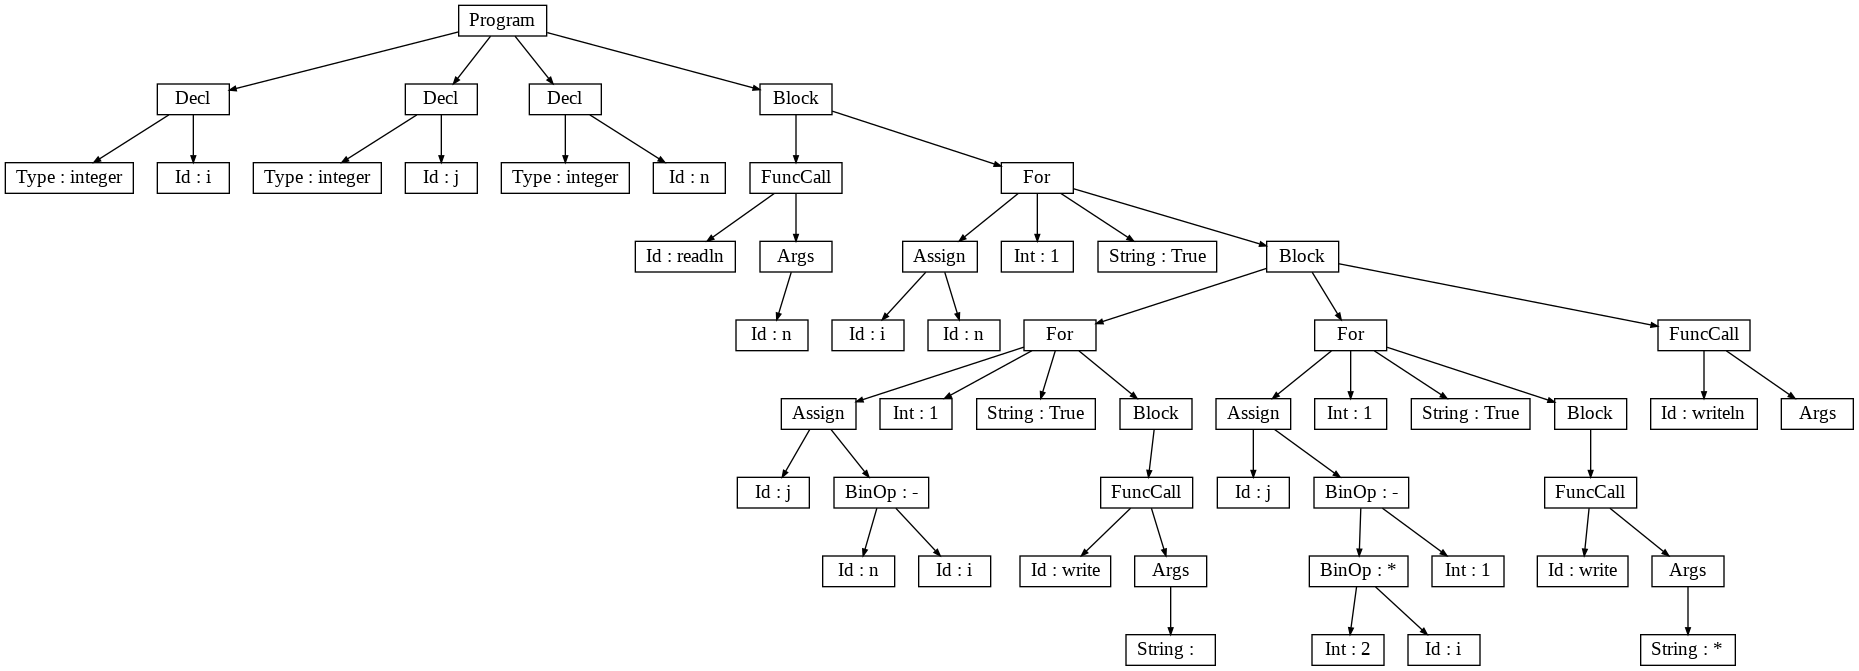

In [30]:
# Fajlovi iz prvog dela
#test_id = 3
#path = f'/content/drive/My Drive/Datoteke/Prva faza/pas/test{test_id}.pas'

# Test novih fajlova, drugi deo 
path = f'/content/drive/My Drive/Datoteke/Druga faza/07/src.pas'

with open(path, 'r') as source:
    text = source.read()

    lexer = Lexer(text)
    tokens = lexer.lex()

    #for t in tokens:
      #print(t)

    parser = Parser(tokens)
    ast = parser.parse()
    #print("\nDone.")

    # Grafer
    grapher = Grapher(ast)
    img = grapher.graph()

    
    # Generator
    generator = Generator(ast)
    code = generator.generate('main.c')


# AST Preview
Image(img)

# Generator radi primer 1,2,3,4,5,6,7,8,9,10,12,13,14,
# Primer 15,16 ne radi



In [31]:
!cat '{code}'


int main() {
int i;
int j;
int n;
scanf("%d", &n);
for (i = n;i>=1;i--) {
for (j = n-i;j>=1;j--) {
printf(" ");
 } 
for (j = 2*i-1;j>=1;j--) {
printf("*");
 } 
printf("\n");
 } 
return 0;
 }

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Druga faza - Generator
Uradjen je samo generator.
Rade primeri 1-14, bez 15.

16 ne radi, jer x nije deklarisano nigde. 


Nisam se bas snasao sa delom za testiranje, tako da ove celije ne sluze nicemu.


In [ ]:

# ACINONYX 
DEBUG = False # OBAVEZNO: Postaviti na False pre slanja projekta
 
if DEBUG:
   test_id = '06' # Redni broj test primera [01-16]
   path_root = '/content/drive/My Drive/Datoteke/Druga faza/'
   args = {}
   args['src'] = f'{path_root}{test_id}/src.pas' # Izvorna PAS datoteka
   args['gen'] = f'{path_root}{test_id}/gen.c' # Generisana C datoteka
else:
   import argparse
   arg_parser = argparse.ArgumentParser()
   arg_parser.add_argument('src') # Izvorna PAS datoteka
   arg_parser.add_argument('gen') # Generisana C datoteka
   args = vars(arg_parser.parse_args())
 
with open(args['src'], 'r') as source:
   text = source.read()
   lexer = Lexer(text)
   tokens = lexer.lex()
   parser = Parser(tokens)
   ast = parser.parse()
   #symbolizer = Symbolizer(ast)
   #symbolizer.symbolize()
   generator = Generator(ast)
   generator.generate(args['gen'])
   #runner = Runner(ast)
   #runner.run()
 
# ACINONYX - END


In [ ]:
# GRADER - BEGIN
 
# 1. Preuzeti direktorijum Datoteke sa materijala
# 2. Postaviti arhivu u content direktorijum u okviru sesije
# 3. Napraviti i pokrenuti ćeliju sa komandom !unzip 'arhiva.zip'
# 4. Postaviti DEBUG promenljivu na False
# 5. Zakomentarisati linije koje počinju znakom !
# 6. Preuzeti notebook kao .py datoteku i imenovati je main.py
# 7. Postaviti main.py na putanju na koju pokazuje path_root
# 8. Postaviti DEBUG promenljivu na True
# 9. Otkomentarisati linije koje počinju znakom !
# 10. Pokrenuti grader.sh pokretanjem ove ćelije
 
if DEBUG:
   path_grader = f'{path_root}grader.sh'
   !chmod +x '{path_grader}' # Dozvola za izvršavanje
   !bash '{path_grader}' '{path_root}' # Pokretanje gradera
 
# GRADER - END
